# Uncertainty & Quantum Money
<hr></hr>

<a name="back1"></a> Quantum money refers to a cryptographic protocol designed to protect certain assets (like currency) from being copied and counterfeited. It was first proposed by Stephen Wiesner and published in 1983 in a paper entitled "Conjugate Coding" [[Weisner83]](https://dl.acm.org/doi/pdf/10.1145/1008908.1008920)[$^*$](#footnote1).

The protocol relies on the [uncertainty principle](https://en.wikipedia.org/wiki/Uncertainty_principle) of quantum mechanics, which states that there is a fundamental limit to how precisely one can simultaneously determine the values of two physical properties of a quantum system, commonly referred to as complementary or **conjugate** variables. In the original paper, this is exemplified using spin $1/2$ particles, but as we've seen in previous chapters, we can map spin to the more general framework of quantum circuits, and use the values a qubit takes in either the bit basis or sign basis as the pair of conjugate properties.

## 1. Quantum Uncertainty

The uncertainty principle is most typically introduced in the context of a particle with position $x$ and momentum $p.$ According to the rules of quantum mechanics, the precision with which these two properties can be simultaneously measured is constrained by the following expression:

$$ \Delta x\Delta p \geq \frac{\hbar}{2} .$$

Here, $\Delta x$ and $\Delta  p$ correspond to the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation#Standard_deviation_of_the_mean) of position and momentum, respectively, and $\hbar$ is the [reduced Planck constant](https://en.wikipedia.org/wiki/Planck_constant#Reduced_Planck_constant). This equation basically says that, if one tries to, for example, measure the position of a particle very precisely (making $\Delta x$ very small), the uncertainty in the momentum (specified by $\Delta p$) must grow to guarantee that their product is always larger or equal to a fundamental constant, given by $\hbar/2$.

The concept of uncertainty generalizes to many other pairs of conjugate properties, such as the perpendicular directions along which the spin of an electron is measured, or in our case, two orthogonal basis a qubit can be measured in. 

In this section, we will introduce the concept of uncertainty using a simple example that captures the spirit of this idea, and then discuss the formal formulation of the uncertainty principle using observables (although, these details, which are presented in section 1.2, won't be necessary to understand the quantum money protocol, so feel free to skip it).

### 1.1 Understanding Quantum Uncertainty

Let's consider the case of a classical bar magnet with its north pointing diagonally along one of the following four directions $(\textit{I}, \textit{II}, \textit{III}, \textit{IV})$:

<img src="images/03_01_01_barmag_orientation.png" align = "center" width="800"/>

One way to figure out in which of these four configurations a magnet could be in, is by using a set of Stern-Gerlach (SG) devices:

<img src="images/03_01_02_barmag_SG.png" align = "center" width="600"/>

Passing bar magnets with their north pointing in directions $\textit{I}$ and $\textit{II}$ through an SG apparatus with its magnetic field gradient along the $\texttt{+}x$ direction, will cause the magnets to deflect in the $\texttt{+}x$ direction. On the other hand, magnets in configurations $\textit{III}$ and $\textit{IV}$ will be deflected in the $\texttt{-}x$ direction. 

We can then take the magnets that deflected in the $\texttt{+}x$ direction and pass them through a second SG device with its gradient along the $\texttt{+}z$ direction. This will deflect magnets in configuration $\textit{I}$ in the $\texttt{+}z$ direction, and magnets configuration $\textit{II}$ in the $\texttt{-}z$ direction. Doing the same with magnets that deflected in the $\texttt{-}x$ direction will then allow us to clearly identify the four possible configurations by looking at where in the screen the magnets landed.

But what if we want to perform the experiment with electrons instead?:

<img src="images/03_01_04_spin_orientation.png" align = "center" width="800"/>

We could try running them through the same series of SG devices; however, as we've shown before, the non-deterministic behavior of these particles introduces a few challenges:

<img src="images/03_01_03_spin_SG.png" align = "center" width="600"/>

The first issue is that, running an electron-like particle through the first SG apparatus will deflect it **probabilistically** in either the $\texttt{+}x$ or $\texttt{-}x$ direction with probabilities of:

$$ P_{\texttt{+}x}(\theta) = \frac{1}{2}\big(1 + \sin(\theta) \big) \quad \text{and} \quad P_{\texttt{-}x}(\theta) = \frac{1}{2}\big(1 - \sin(\theta) \big) .$$

Therefore, if we want to figure out the particle's direction along the $x$ axis, we need to be able to prepare the same configuration more than once, and collect statistics of the results. Assuming we can do this, it is then not so difficult to figure out if the particle is in either configurations $\textit{I} \text{-} \textit{II}$, or in configurations $\textit{III} \text{-} \textit{IV} .$ This is because: 

- For configurations $\textit{I}$ and $\textit{II}$, the corresponding angles are $\pi/4$ and $3\pi/4$, which result in a high probability of the particle deflecting in the $\texttt{+}x$ direction:


    $$ P_{\texttt{+}x}\left(\frac{\pi}{4}\right) = P_{\texttt{+}x}\left(\frac{3\pi}{4}\right) \approx 0.853 \quad \text{and} \quad P_{\texttt{-}x}\left(\frac{\pi}{4}\right) = P_{\texttt{-}x}\left(\frac{3\pi}{4}\right) \approx 0.146 .$$

- For configurations $\textit{III}$ and $\textit{IV}$, the corresponding angles are $5\pi/4$ and $7\pi/4$, which result in a high probability of the particle deflecting in the $\texttt{-}x$ direction:


    $$ P_{\texttt{+}x}\left(\frac{5\pi}{4}\right) = P_{\texttt{+}x}\left(\frac{7\pi}{4}\right) \approx 0.146 \quad \text{and} \quad P_{\texttt{-}x}\left(\frac{5\pi}{4}\right) = P_{\texttt{-}x}\left(\frac{7\pi}{4}\right) \approx 0.853 .$$
    
    
Now, here is the real problem. Once we run a particle through the first SG device, its spin will be projected to point along the $\texttt{+}x$ or $\texttt{-}x$ direction. So, running these particles through the second SG apparatus, which is oriented along the $z$ axis, will cause them to deflect either upwards or downwards but not with a probability associated with the original particle's orientation! Rather, the probability of the particle deflecting up or down is always $1/2$. In other words, performing a measurement along the $x$ axis in a sense "scrambles" the information about the particle's original $z$ orientation, preventing us from knowing in which of the four configurations the particle was in. Therefore, there is simply no way to measure both the $x$ and $z$ orientation of an electron using this setup.

We then say that these observable properties (spin along $x$, and spin along $z$) are **incompatible**. Just like the position and momentum of a moving particle, $x$-spin and $z$-spin are conjugate variables, which means that measuring one of them increases our uncertainty of the other. This seems like an annoying inconvenience; however, it is precisely this property that the quantum money protocol exploits to make some valuable asset secure.

**NOTE**: The details from section 1.1 should be more than enough to provide the background necessary for the quantum money protocol. Section 1.2 simply provides a more detailed description of the uncertainty principle in the context of qubits.

### 1.2 Quantum Uncertainty with Qubits

Since electron spin is one of the many different physical implementations for a qubit, it should be no surprise that the same effect of incompatible observables we saw above shows up in the case of a general qubit. Therefore, we can construct an uncertainty relation using the language of statevectors and observables we have previously introduced.

To keep things simple, let's first consider the case of a qubit in the $xz$-plane, pointing at some angle $\theta$ with respect to the $+z$ direction:

$$|q\rangle = \cos\left(\frac{\theta}{2} \right)|0\rangle + \sin\left(\frac{\theta}{2} \right)|1\rangle $$

[Recall](https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#quantum-observables) that, we can calculate the expectation value of measuring the $Z$ observable as:

$$ 
\begin{aligned}
\langle Z \rangle_q &= \langle q | Z | q \rangle_q 
\\
\\
\langle Z \rangle_q &= \left[\cos\left(\frac{\theta}{2} \right)\langle 0| + \sin\left(\frac{\theta}{2} \right) \langle 1|\right] Z \left [\cos\left(\frac{\theta}{2} \right)|0\rangle + \sin\left(\frac{\theta}{2} \right)|1\rangle \right]
\\
\\
\langle Z \rangle_q &= \cos^2 \left(\frac{\theta}{2} \right) - \sin^2\left(\frac{\theta}{2}\right) 
\\
\\
\langle Z \rangle_q &= \cos \left(\theta\right).
\end{aligned}
$$

Similarly, we can do the same for the $X$ observable:

$$ 
\begin{aligned}
\langle X \rangle_q &= \langle q | X | q \rangle_q 
\\
\\
\langle X \rangle_q &= \left[\cos\left(\frac{\theta}{2} \right)\langle 0| + \sin\left(\frac{\theta}{2} \right) \langle 1|\right] X \left [\cos\left(\frac{\theta}{2} \right)|0\rangle + \sin\left(\frac{\theta}{2} \right)|1\rangle \right]
\\
\\
\langle X \rangle_q &= 2\cos \left(\frac{\theta}{2} \right) \sin\left(\frac{\theta}{2}\right)
\\
\\
\langle X \rangle_q &= \sin\left(\theta\right) .
\end{aligned}
$$

To compute the standard deviation for each of these observables, we can use the definition of the [variance](https://en.wikipedia.org/wiki/Variance) (the standard deviation squared) as a function of the expectation value:

$$ \Delta {O}^2 = \langle O^2 \rangle_q - \langle O \rangle_q^2 ,$$

where $O$ is either $Z$ or $X$. For the first part of this expression, we have that $X^2 = Z^2 = I$, therefore:

$$ \langle O^2 \rangle_q = \langle q | I | q \rangle = \langle q | q \rangle = 1 .$$

So, for the $Z$ observable:

$$ 
\begin{aligned}
\Delta {Z} &= \sqrt{\langle Z^2 \rangle_q - \langle Z \rangle_q^2} 
\\
\\
\Delta {Z} &= \sqrt{1 - \cos^2 \left(\theta\right)}
\\
\\
\Delta {Z} &= \big| \sin(\theta) \big|.
\end{aligned}
$$

Similarly, for $X$ we have:

$$ 
\begin{aligned}
\Delta {X} &= \sqrt{\langle X^2 \rangle_q - \langle X \rangle_q^2} 
\\
\\
\Delta {X} &= \sqrt{1 - \sin^2 \left(\theta\right)}
\\
\\
\Delta {X} &= \big| \cos(\theta) \big|.
\end{aligned}
$$

If we plot these two values, we can see how when the uncertainty of measuring one of these observables (i.e., its standard deviation) decreases, the uncertainty in the other observable increases. As a matter of fact, fot the specific case of $X$ and $Z$, when the uncertainty of one of them is minimum, the uncertainty in the other is maximum, as expected.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

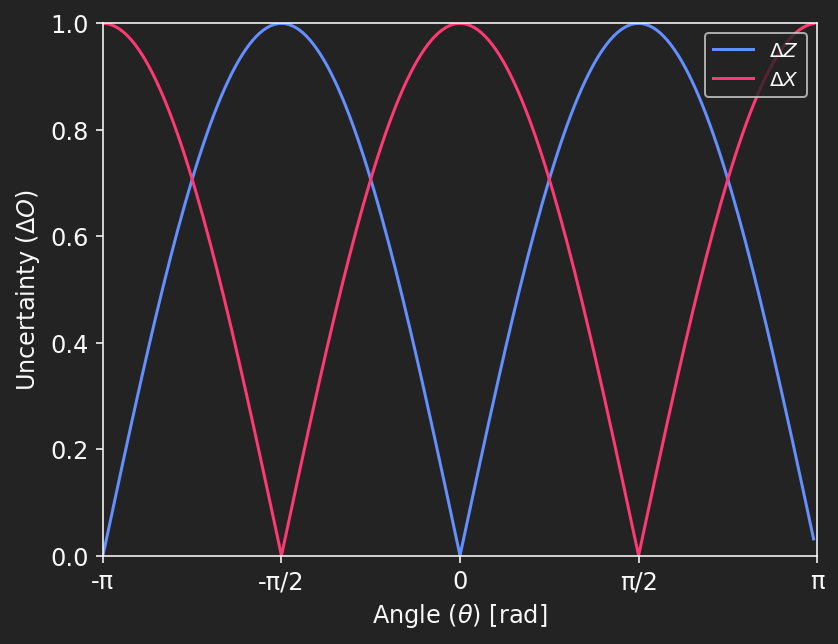

In [2]:
θ_arr = np.arange(-np.pi, np.pi, np.pi/100)
ΔZ = np.abs(np.sin(θ_arr))
ΔX = np.abs(np.cos(θ_arr))

plt.plot(θ_arr,ΔZ)
plt.plot(θ_arr,ΔX)

plt.xlim([-np.pi,np.pi])
plt.ylim([0,1])
plt.xticks(ticks=[-np.pi,-np.pi/2, 0, np.pi/2, np.pi],
           labels=['-π','-π/2', '0', 'π/2', 'π'],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Uncertainty $(\\Delta O)$',fontsize=12)
plt.xlabel('Angle $(\\theta)$ [rad]',fontsize=12)
plt.legend(['$\\Delta Z$', '$\\Delta X$'], loc = 'upper right')
plt.show()

In the above, we only consider qubits in the $xy$-plane, but for the complete definition of a qubit:

$$|q\rangle = \cos\left(\frac{\theta}{2} \right)|0\rangle + e^{i\varphi} \sin\left(\frac{\theta}{2} \right)|1\rangle, $$

the general uncertainty relation is given by:

$$ \Delta A \Delta B \geq \frac{1}{2} \big| \left \langle \left[ A, B \right ] \right \rangle \big| .$$

Where $\left[ A, B \right ]$ is known as the [commutator](https://en.wikipedia.org/wiki/Commutator#Ring_theory) of observables $A, B$, and is given by:

$$\left[ A, B \right ] = AB - BA .$$

In the particular case of observables $X, Y, Z, $ we have the following commutation relations:

$$\left[ X, Y \right ] = 2iZ, \quad \left[ Y, Z \right ] = 2iX, \quad \left[ Z, X \right ] = 2iY .$$

So, going back to the uncertainty relation between observables $Z$ and $X$, we get the following expression:

$$ \Delta Z \Delta X \geq \big| \left \langle iY \right \rangle \big| .$$

Here, $\Delta Z$, $\Delta X$, and $\langle iY \rangle$, should of course be calculated using the expression for $|q\rangle$ that includes the relative phase term $e^{i\varphi} .$ 

For the first two we get:

$$ 
\begin{aligned}
\Delta Z &= \sqrt{1 - \cos^2(\theta)} = \big|\sin(\theta) \big|
\\
\\
\Delta X &= \sqrt{1 - \sin^2(\theta)\cos^2(\varphi)} .
\end{aligned}
$$

And for the right-hand side of the inequality we have:

$$ \big| \left \langle iY \right \rangle \big| = \big|\sin(\theta) \sin(\varphi) \big| $$

Let's now plot both sides of this equation as a function of $\theta$ and for a few values of $\varphi$:

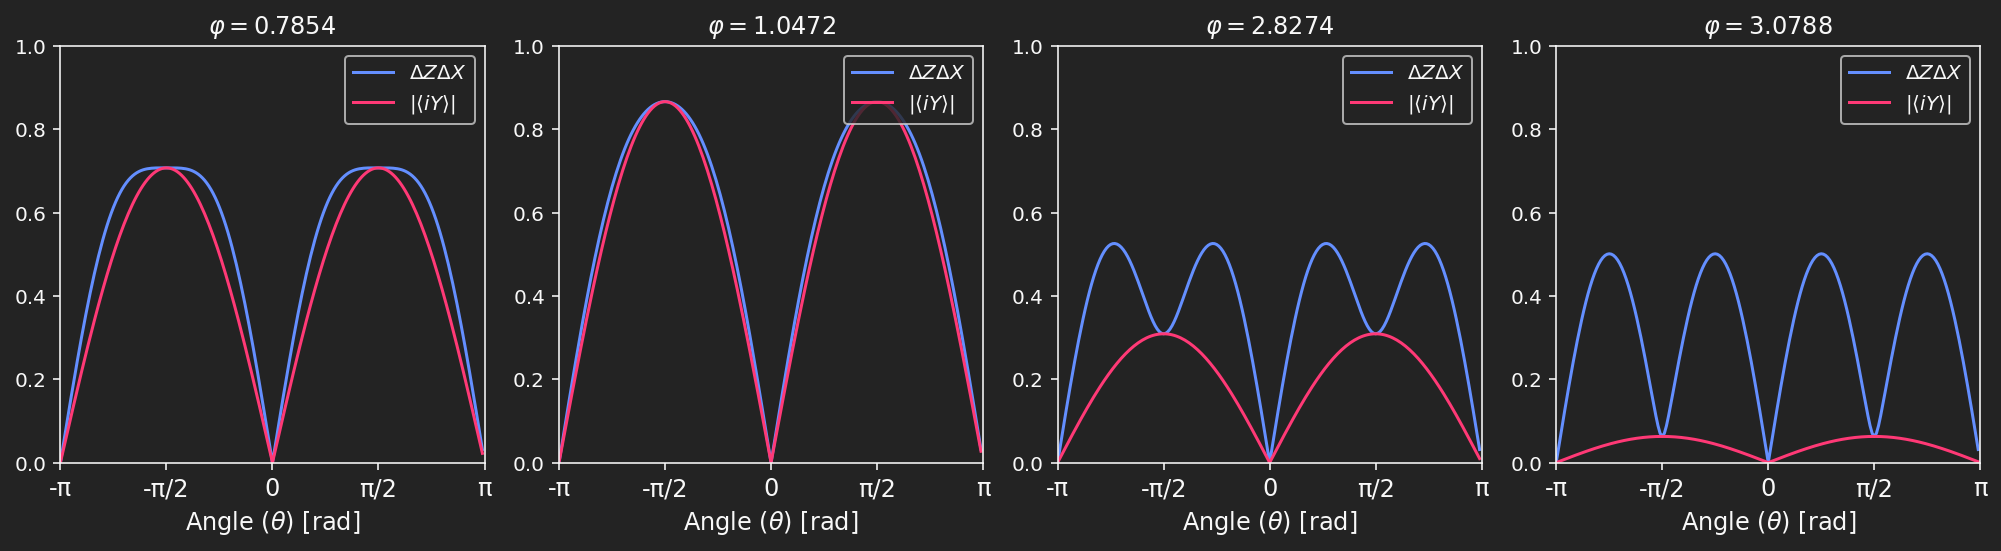

In [35]:
# Plot uncertainty relation for X, Z observables for statevector
# |q⟩ = cos(θ/2)|0⟩+exp(iφ)sin(θ/2)|1⟩ using different values of θ and φ

θ_arr = np.arange(-np.pi, np.pi, np.pi/100)
φ_lst = [np.pi/4, 2*np.pi/6, 9*np.pi/10, 49*np.pi/50]

fig, axes = plt.subplots(1, len(φ_lst), figsize=(14, 4))  # 3 rows, 1 column

for i, φ_val in enumerate(φ_lst):
    ΔZ = np.abs(np.sin(θ_arr))
    ΔX = np.sqrt(1-np.sin(θ_arr)**2 * np.cos(φ_val)**2)
    Ys = np.abs(np.sin(θ_arr)*np.sin(φ_val))
    
    axes[i].plot(θ_arr,ΔZ*ΔX, label="$\\Delta Z \\Delta X$")
    axes[i].plot(θ_arr,Ys, label="$| \\langle iY \\rangle |$")
    
    axes[i].set_xlim([-np.pi,np.pi])
    axes[i].set_xticks(ticks=[-np.pi,-np.pi/2, 0, np.pi/2, np.pi],
                       labels=['-π','-π/2', '0', 'π/2', 'π'],fontsize=12)
    axes[i].set_ylim([0,1])
    axes[i].set_title(f'$\\varphi = ${np.around(φ_val,4)}')
    axes[i].legend(loc='upper right')
    axes[i].set_xlabel('Angle $(\\theta)$ [rad]',fontsize=12)

plt.tight_layout()
plt.show()

From these plots, it is clear that, for every value of $\theta$ and $\varphi$ the uncertainty relation $ \Delta Z \Delta X \geq \big| \left \langle iY \right \rangle \big| $ is always satisfied.

We can also use Qiskit's Estimator primitive to compute the expectation value and standard deviation for a given statevector and observable. Let's perform this simulation and compare it with the theoretical results above:

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Estimator

estimator = Estimator(mode=AerSimulator())

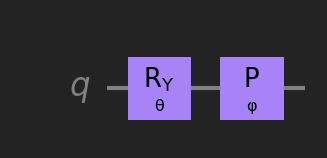

In [5]:
# Use the Paramater class to define arbitrary angles of θ and φ
θ = Parameter('θ')
φ = Parameter('φ')

# Circuit to prepare state cos(θ/2)|0⟩+exp(iφ)sin(θ/2)|1⟩
qc = QuantumCircuit(1)
qc.ry(θ,0)
qc.p(φ,0)
qc.draw()

In [13]:
# Define list of angle pairs [θ,φ] (we will only simulate one value of φ)
φ_val = 9*np.pi/10
θ_short = np.arange(-np.pi, np.pi+np.pi/10, np.pi/10)
angles = [[θ_val, φ_val] for θ_val in θ_short]

In [14]:
# Define list of observables:
obsv_lst = [[SparsePauliOp(["Z"],[1])],
            [SparsePauliOp(["X"],[1])],
            [SparsePauliOp(["Y"],[1])]]

# NOTE: Technically, the coeff for Y should be 1j, but qiskit does not allow for imaginary
# coefficients. However, since we take the abs value of it, the result does not change.

In [15]:
# Run estimator simulation
job = estimator.run([(qc,obsv_lst,angles,0.01)])
exp_vals = job.result()[0].data.evs

# Extract standard deviations for X,Z and expectation values for Y
ΔZ_lst = np.sqrt(1-exp_vals[0]**2)
ΔX_lst = np.sqrt(1-exp_vals[1]**2)
ΔZΔX_lst = ΔZ_lst * ΔX_lst
Ys_lst = np.abs(exp_vals[2])

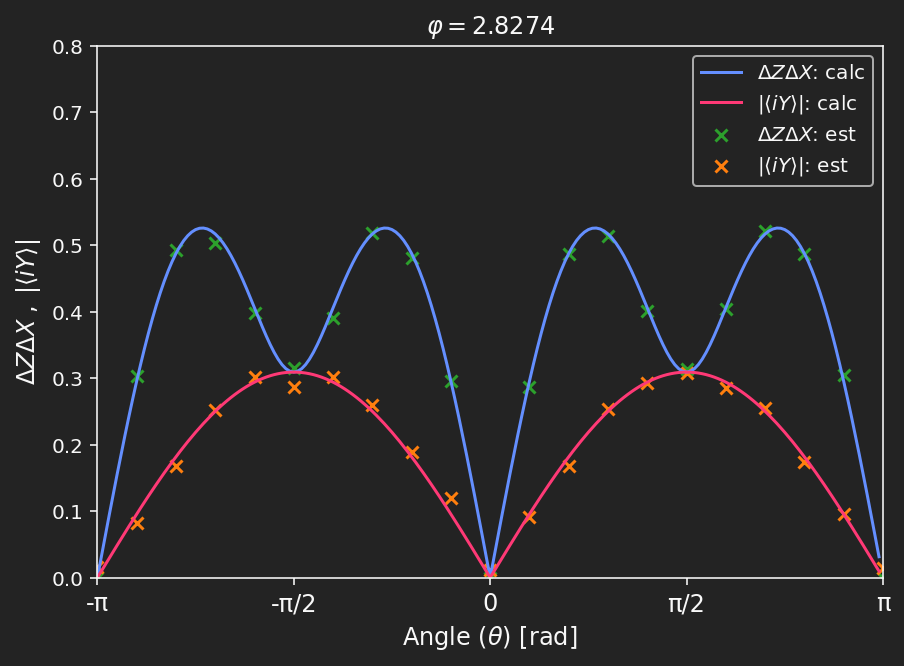

In [34]:
# Plot results from estimator and compare with theoretical curve
fig, axes = plt.subplots(1, 1)

# Compute and plot theoretical values
ΔZ = np.abs(np.sin(θ_arr))
ΔX = np.sqrt(1-np.sin(θ_arr)**2 * np.cos(φ_val)**2)
Ys = np.abs(np.sin(θ_arr)*np.sin(φ_val))
axes.plot(θ_arr,ΔZ*ΔX, label="$\\Delta Z \\Delta X$: calc")
axes.plot(θ_arr,Ys, label="$| \\langle iY \\rangle |$: calc")

#Plot results from estimator
axes.scatter(θ_short,ΔZΔX_lst, marker='x', color='tab:green', label="$\\Delta Z \\Delta X$: est")
axes.scatter(θ_short,Ys_lst, marker='x', color='tab:orange', label="$| \\langle iY \\rangle |$: est")

axes.set_xlim([-np.pi,np.pi])
axes.set_xticks(ticks=[-np.pi,-np.pi/2, 0, np.pi/2, np.pi],
                   labels=['-π','-π/2', '0', 'π/2', 'π'],fontsize=12)
axes.set_ylim([0,0.8])
axes.set_title(f'$\\varphi = ${np.around(φ_val,4)}')
axes.legend(loc='upper right')
axes.set_xlabel('Angle $(\\theta)$ [rad]',fontsize=12)
axes.set_ylabel('$\\Delta Z \\Delta X \; , \; |\\langle iY \\rangle |$',fontsize=12)

plt.tight_layout()
plt.show()

As can be seen, the results from the estimator closely match the those from our calculations. Furthermore, this results should be valid not only for the specific case of the $Z$ and $X$ observables we used, but for any other pair of observables. All we need to do is rely on the general uncertainty relation give by: $ \Delta A \Delta B \geq \frac{1}{2} \big| \left \langle \left[ A, B \right ] \right \rangle \big| .$

## 2. Quantum Money

In [23]:
import sympy as sp

In [40]:
θ, φ = sp.symbols('θ, φ', real=True)

X = sp.Matrix([[0,1],[1,0]])
Z = sp.Matrix([[1,0],[0,-1]])
Y =  sp.Matrix([[0,-1j],[1j,0]])

q = sp.Matrix([[sp.cos(θ/2)],[sp.exp(1j*φ)*sp.sin(θ/2)]])
q

Matrix([
[             cos(θ/2)],
[exp(1.0*I*φ)*sin(θ/2)]])

In [41]:
q_dag = q.conjugate().transpose()
q_dag

Matrix([[cos(θ/2), exp(-1.0*I*φ)*sin(θ/2)]])

In [47]:
Z_exp = sp.simplify(q_dag @ Z @ q)[0]
Z_exp

cos(θ)

In [52]:
ΔZ = (sp.sqrt(1-Z_exp**2))
ΔZ

sqrt(1 - cos(θ)**2)

In [50]:
X_exp = sp.simplify(q_dag @ X @ q)[0]
X_exp

sin(θ)*cos(1.0*φ)

In [53]:
ΔX = (sp.sqrt(1-X_exp**2))
ΔX

sqrt(-sin(θ)**2*cos(1.0*φ)**2 + 1)

In [57]:
sp.trigsimp(ΔZ * ΔX)

sqrt(-sin(θ)**2*cos(1.0*φ)**2 + 1)*Abs(sin(θ))

In [68]:
Y_exp = sp.simplify(q_dag @ (1j*Y) @ q)[0]
sp.Abs(Y_exp)

1.0*Abs(sin(θ)*sin(1.0*φ))

Matrix([
[   0, 1.0],
[-1.0,   0]])





For simplicity, let's consider the case of a qubit in the $xz$-plane, pointing at some angle $\theta$ with respect to the $+z$ direction:

$$|q\rangle = \cos\left(\frac{\theta}{2} \right)|0\rangle + \sin\left(\frac{\theta}{2} \right)|1\rangle $$

From this expression, we can tell that if the angle $\theta$ is equal to $0$, we can confidently say that the qubit is in state $|0\rangle$. Similarly, for $\theta = \pi$, we are confident the qubit is in state $|1\rangle$. We then say that our level of uncertainty of the state of the qubit in this two cases is $0$. Now, in the case where  $\theta = \pm \pi/2$, the state will be:

$$ |q\rangle = \frac{1}{\sqrt{2}} |0\rangle \pm \frac{1}{\sqrt{2}} |1\rangle ,$$

for which it is equally likely to measure $|0\rangle$ or $|1\rangle$. This means that we have a maximum level of uncertainty of what the state of $|q\rangle$ is. To quantify what the uncertainty is for all other angles, we can formulate a simple expression for a measure that meets both of the conditions of being $0$ for $\theta \in \{0,\pi\}$ and maximum for $\theta \in \{\pi/2, -\pi/2\} :$

$$ \mu(\theta) = \left| \cos\left(\theta/2 \right) \right| + \left| \sin\left(\theta/2  \right) \right| - 1 .$$

Let's use a plot to see how $\mu$ changes as a function of $\theta:$

## Footnotes

<a name="footnote1"></a><span style="font-size: smaller;">$^*$Some [accounts](https://orsattath.wordpress.com/2021/08/14/stephen-wiesner/) seem to suggest that Weisner proposed this idea back in 1969 but it was not taken seriously and his manuscript was rejected. The paper was then submitted and published in 1983. ([go back](#back1))</span>